In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DEBUG:cmdstanpy:input tempfile: /tmp/tmpbp3ekqw3/xbka00nd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbp3ekqw3/n3snni_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54119', 'data', 'file=/tmp/tmpbp3ekqw3/xbka00nd.json', 'init=/tmp/tmpbp3ekqw3/n3snni_w.json', 'output', 'file=/tmp/tmpbp3ekqw3/prophet_modelft8ami7t/prophet_model-20241110223144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Missing Values:
Passengers    0
dtype: int64

Dataset Summary:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000

Exponential Smoothing Results:
MSE: 1541.3957425312913
RMSE: 39.26061311965583


22:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


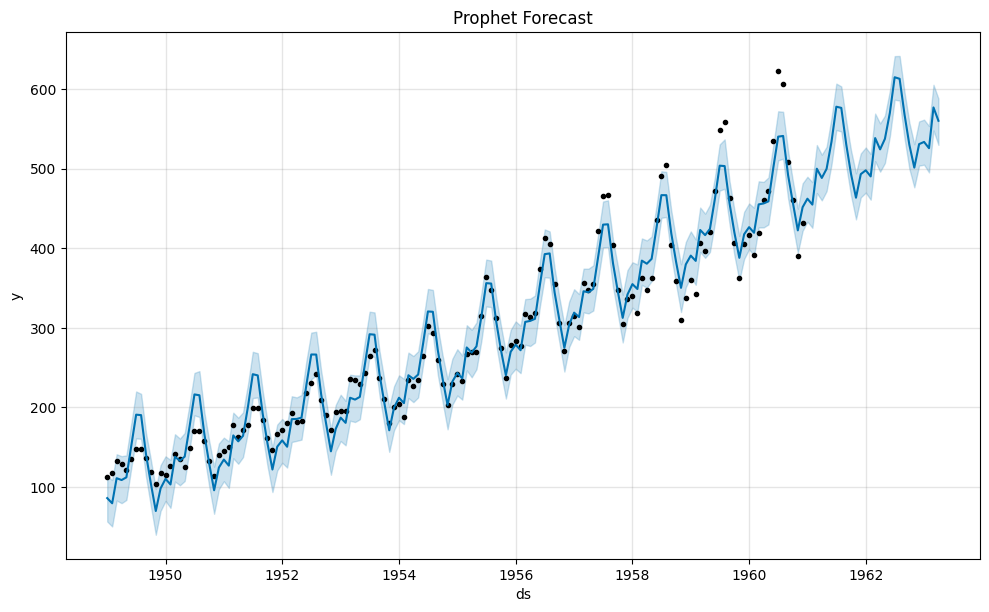

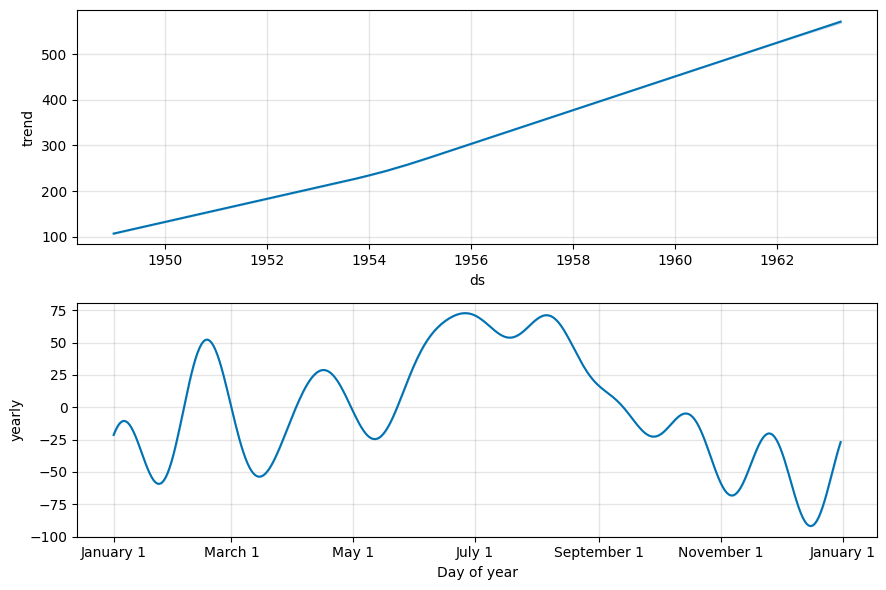

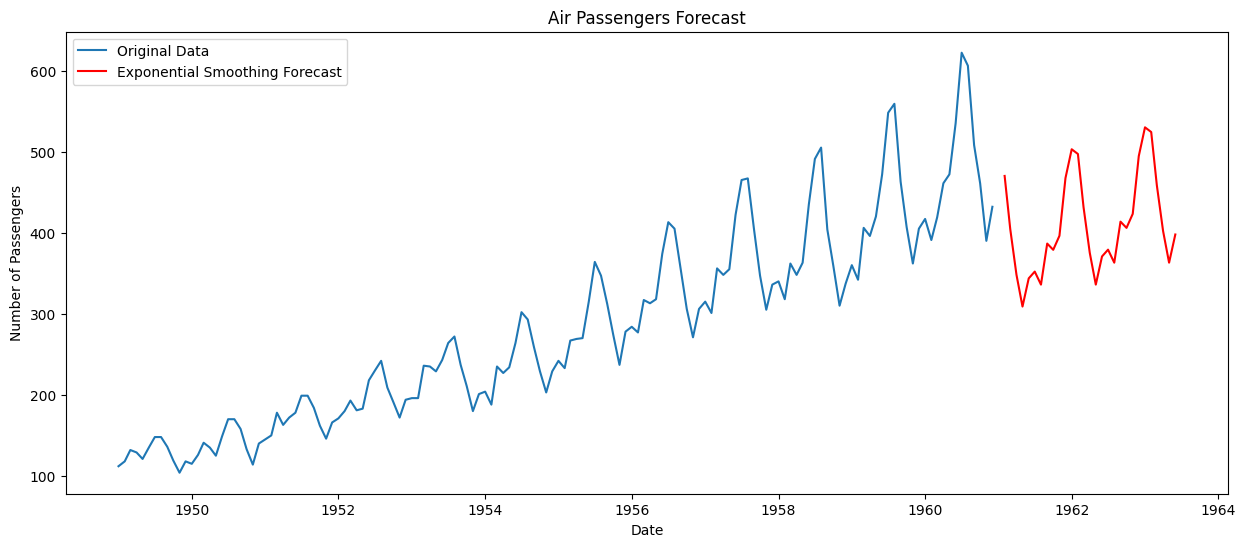

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and Prepare the Dataset
def load_and_prepare_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Convert the Month column to datetime
    df['Month'] = pd.to_datetime(df['Month'])

    # Set the Month column as the index
    df.set_index('Month', inplace=True)

    return df

# Step 2: Data Preprocessing
def preprocess_data(df):
    # Check for missing values
    print("Missing Values:")
    print(df.isnull().sum())

    # Basic statistical summary
    print("\nDataset Summary:")
    print(df.describe())

    return df

# Step 3: Train-Test Split for Time Series
def train_test_split(df, test_size=0.2):
    # Calculate the split point
    split_point = int(len(df) * (1 - test_size))

    # Split the data
    train = df[:split_point]
    test = df[split_point:]

    return train, test

# Step 4: Exponential Smoothing Forecasting
def exponential_smoothing_forecast(train, test):
    # Fit Exponential Smoothing model
    model = ExponentialSmoothing(
        train,
        trend='add',
        seasonal='add',
        seasonal_periods=12
    ).fit()

    # Forecast
    forecast = model.forecast(len(test))

    # Calculate Error Metrics
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    print("\nExponential Smoothing Results:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

    return forecast, model

# Step 5: Prophet Forecasting
def prophet_forecast(df):
    # Prepare data for Prophet
    # Check if the dataset has the correct column names
    if 'Passengers' not in df.columns:
        raise ValueError("The dataset must contain a 'Passengers' column.")

    # Prepare DataFrame for Prophet
    prophet_df = df.reset_index().rename(columns={'Month': 'ds', 'Passengers': 'y'})

    # Create and fit the model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False
    )

    model.fit(prophet_df)

    # Create future dataframe for forecasting
    future = model.make_future_dataframe(periods=len(df)//5, freq='M')
    forecast = model.predict(future)

    # Plot the forecast
    fig1 = model.plot(forecast)
    plt.title('Prophet Forecast')
    plt.show()

    # Plot forecast components
    fig2 = model.plot_components(forecast)
    plt.show()

    return forecast

# Step 6: Visualization
def visualize_forecasts(df, exp_smoothing_forecast):
    plt.figure(figsize=(15,6))

    # Original Data
    plt.plot(df.index, df['Passengers'], label='Original Data')

    # Exponential Smoothing Forecast
    forecast_index = pd.date_range(
        start=df.index[-1],
        periods=len(exp_smoothing_forecast)+1,
        freq='M'
    )[1:]
    plt.plot(forecast_index, exp_smoothing_forecast,
             color='red', label='Exponential Smoothing Forecast')

    plt.title('Air Passengers Forecast')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.legend()
    plt.show()

# Main Execution
def main():
    # File path for the dataset
    file_path = '/content/drive/MyDrive/AirPassengers.csv'

    # Load
    # Load and prepare data
    df = load_and_prepare_data(file_path)

    # Preprocess data
    df = preprocess_data(df)

    # Train-Test Split
    train, test = train_test_split(df)

    # Exponential Smoothing Forecast
    exp_smoothing_forecast, exp_smoothing_model = exponential_smoothing_forecast(train, test)

    # Prophet Forecast
    prophet_results = prophet_forecast(df)

    # Visualize Forecasts
    visualize_forecasts(df, exp_smoothing_forecast)

# Run the script
if __name__ == "__main__":
    main()

In [ ]:
# Step 6: Visualization
def visualize_forecasts(df, exp_smoothing_forecast, prophet_results): # Added prophet_results as an argument
    plt.figure(figsize=(15,6))

    # Original Data
    plt.plot(df.index, df['Passengers'], label='Original Data')

    # Exponential Smoothing Forecast
    forecast_index = pd.date_range(
        start=df.index[-1],
        periods=len(exp_smoothing_forecast)+1,
        freq='M'
    )[1:]
    plt.plot(forecast_index, exp_smoothing_forecast,
             color='red', label='Exponential Smoothing Forecast')

    # You can add code here to visualize prophet_results if needed
    # For example, you could plot the 'yhat' column from prophet_results
    # plt.plot(prophet_results['ds'], prophet_results['yhat'], color='green', label='Prophet Forecast')

    plt.title('Air Passengers Forecast')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.legend()
    plt.show()